In [58]:
# Algoritmo Metropolis-Hastings!

El problema básico que intenta resolver el algoritmo Metropolis-Hastings es proporcionar un método para generar muestras de alguna distribución genérica, P(x). 
La idea es que en muchos casos, podemos saber cómo escribir la ecuación para la distribución de probabilidad P(x), 
pero no sabemos cómo generar muestras aleatorias de la misma. 
Entonces la idea básica detrás de este algoritmo es la de construir una cadena de Markov cuya distribución invariante sea la distribución de muestreo que deseamos, es decir P(x). 

¿Cómo funciona el algoritmo?  

Supongamos que el estado actual de la cadena de Markov es xn, y queremos generar xn+1.  

De acuerdo con el algoritmo Metropolis-Hastings, la generación de xn+1 es un proceso en dos etapas: 

-La primera etapa consiste en generar un candidato, que denominaremos x∗. El valor de x∗ se genera a partir de la distribución propuesta, denotada Q(x∗|xn), la cual depende del estado actual de la cadena de Markov , xn. 
Existen algunas limitaciones técnicas menores sobre la distribución propuesta que podemos utilizar, pero en su mayor parte puede ser cualquier cosa que deseemos. 
Una forma típica de hacerlo es utilizar una distribución normal centrada en el estado actual xn.  

$ x^∗|xn∼Normal(xn,σ^2)$

La segunda etapa es la de aceptación-rechazo. Lo primero que debemos hacer en este paso es calcular la probabilidad de aceptación A(xn→x∗), la cual estará dada por:

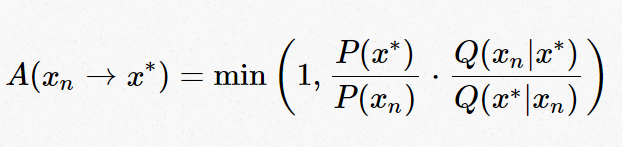

Ahora que tenemos el candidato x∗ y hemos calculado la probabilidad de aceptación $A(xn→x∗)$,   
es tiempo de decidir aceptar al candidato (en cuyo caso se establecemos xn+1=x∗); o rechazar al candidato (en cuyo caso estableceremos xn+1=xn).  
Para tomar esta decisión, generamos un número aleatorio (uniformemente distribuido) entre 0 y 1, que denominaremos u.  

Entonces:
    
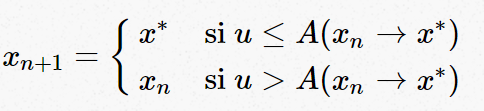




>Referencia Raúl López Breiga, Enero 2017. [Introducción a los métodos de Montecarlo con Python](https://relopezbriega.github.io/blog/2017/01/10/introduccion-a-los-metodos-de-monte-carlo-con-python/)

# Funciones
MATPLOTLIB.PYPLOT
Matplotlib.pyplot.hist(x, bins=None, range=None, density=False, 
weights=None, cumulative=False, bottom=None, histtype='bar', 
align='mid', orientation='vertical', rwidth=None, log=False, 
color=None, label=None, stacked=False, *, data=None, **kwargs)

NUMPY 
zeros(shape, dtype) 
–>Crea un array de 0 compuesto de “shape” elementos”.
linspace(start,stop,num,endpoint=True,retstep=False) 
–>Crea un array con valor inicial start, valor final stop y num elementos.
np.random.random()
-->Devuelve flotantes aleatorios en el intervalo semiabierto [0.0, 1.0)

SCIPY
https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

func.mean()
--> Función Media
func.pdf()
--> Función de probabilidad

In [59]:
# importando modulos necesarios
import matplotlib.pyplot as plt #Versión 2.2.4
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats
%matplotlib inline

In [60]:
 def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

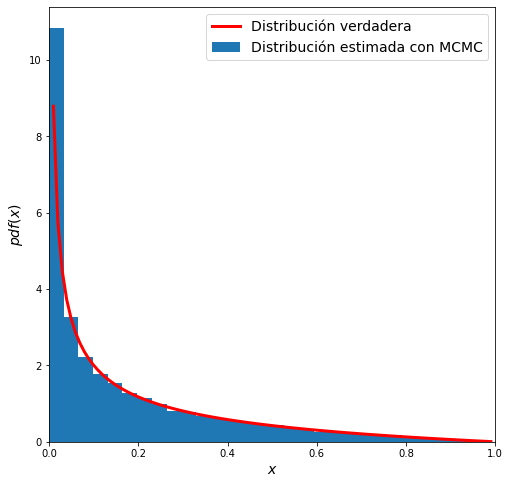

In [61]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30,density=True, label='Distribución estimada con MCMC') #normed=True,
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

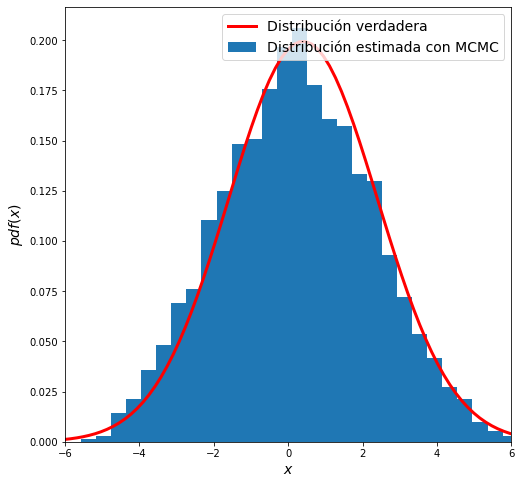

In [62]:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()
